# <center>Projeto Final do Módulo VI</center>
<center> Alguns gastos suspeitos identificados

<center><img src='https://i.imgur.com/QLJaHpa.png' style="width:200px">

<center><a href="https://colab.research.google.com/github/Sartorio12/Projeto_Modulo_5/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 5:** <a href="https://github.com/LeGuigs" target="_blank">Guilherme Rezende</a> ; <a href="https://github.com/LaioGomes" target="_blank">Laio Gomes</a> ; <a href="https://github.com/sartorio12" target="_blank">Mateus Sartorio</a>; <a href="https://github.com/jonathaslkc" target="_blank">Jonathas Carvalho</a>



<center><img src='https://i.imgur.com/QadqCNH.jpg' style="width:600px">
<center>Fonte: Agência Câmara de Notícias — Roque de Sá/Agência Senado

---

# **1.** Sobre o estudo e objetivos

O que você imagina quando ouve o conceito **"Cota Parlamentar"** ou **"Cota para o Exercício da Atividade Parlamentar (CEAP)"**?

Você sabia que é através da **CEAP** que deputados e senadores custeiam suas despesas em atividades parlamentares? O mais interessante disso, é que os dados da CEAP que iremos analisar hoje são abertos e podem ser acessados por qualquer pesso, ou seja, qualquer pessoa pode ver como os deputados e senadores utilizam essse tipo de recurso. 

Apesar de cobrir uma quantidade grande de despesas, os gastos com a CEAP devem seguir uma série de regras definidas pelo Ato da Mesa 43/2009. Isso quer dizer que os parlamentares não podem utilizar esses recursos de qualquer maneira. Alguns exemplos de gastos vedados são a aquisição de gêneros alimentícios (ex.: o parlamentar pode gastar com as suas refeições mas não pode comprar carne para o churrasco no fim de semana), gastos de caráter eleitoral e gastos com a participação em cursos de educação básica, graduação e pós-graduação.

Além disso, como citado anteriormente, a CEAP é destinada a custear gastos exclusivamente vinculados ao exercício da atividade parlamentar, o que veda o seu uso para o benefício de terceiros, como por exemplo, o pagamento de refeições para outras pessoas além do próprio parlamentar.
Apesar de todas essas regras, a fiscalização desses gastos é bastante falha, sendo comum o surgimento de denúncias sobre irregularidades.

Neste cenário surgiu um projeto chamado Operação Serenata de Amor ( https://serenata.ai/ ), que tem como objetivo utilizar ferramentas de ciência de dados para fiscalizar gastos públicos e compartilhar informações relevantes com o público. O projeto tem uma série de módulos. Alguns deles são responsáveis por baixar e limpar os dados, outros por identificar irregularidades e por fim existem alguns módulos responsáveis pela divulgação de eventuais alertas de irregularidades. Um desses módulos de divulgação é o bot @RosieDaSerenata, responsável por publicar alertas de irregularidades no Twitter.

<center><img src='https://i.imgur.com/AjyWlf1.jpg'>

**É sobre isso que vamos tratar nesta análise, que tem dois focos principais:**
- *Demonstrar como investigaremos esses dados utilizando Python.*
- *Elaborar conceitos a respeito da utilização da CEAP nos últimos 3 anos, com destaques no cenário de pandemia(COVID-19).*

#### <center> **Nós do grupo 5 esperamos que a leitura desse notebook seja esclarecedora e útil :)**

# **2.** Começando a nossa análise

Essa parte será um pouco teórica, pois nela exibiremos um pouco sobre a limpeza dos dados coletados no site da Câmara. Caso você queira somente acompanhar quais foram as nossas deduções baseadas nessas informações, pode pular para a parte X ( Preciso preencher a parte ).

*Antes de mais nada, vamos apresentar um glossário sobre o DataSet:*

- `Nome Parlamentar(txNomeParlamentar)` :  *Nome adotado pelo Parlamentar ao tomar posse do seu mandato.*
- `ideCadastro(Identificador Único do Parlamentar)` : *Número que identifica unicamente um deputado federal na CD.*
- `nuCarteiraParlamentar(Número da Carteira Parlamentar)` : *Documento usado para identificar um deputado federal na CD.*
- `nuLegislatura(Número da  Legislatura)` : *No contexto da cota CEAP, representa o ano base de início da legislatura.*
- `sgUF(Sigla da Unidade Federal)` : *Representa a UF do parlamentar.*
- `sdPartido(Sigla do Partido)` : *Representa o partido do parlamentar.*
- `codLegislatura(Código da Legislatura)` : *No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura.*
- `numSubCota(Número da Subcota) `: *Representa o código do Tipo de Despesa, comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.*
- `txtDescricao(Descrição da Subcota)` : *Descrição do Tipo de Despesa.*
- `numEspecificacaoSubCota(Número da Especificação da Subcota)` : *Representa o código desta especificação mais detalhada.*
- `txtDescricaoEspecificacao(Descrição da Especificação da Subcota)` : *Detalha o tipo de despesa efetuada.*
- `txtFornecedor(Fornecedor)` : *Representa o fornecedor do produto ou serviço presente no documento fiscal.*
- `txtCNPJCPF(CNPJ/CPF)` : *Indica se o fornecedor é CNPJ ou CPF , presente no documento fiscal.*
- `txtNumero(Número do Documento)` : *Indica o número do documento do emissor da NF em questão.*
- `indTipoDocumento(Indicativo de Tipo de Documento Fiscal)` : *Tipo de documento do fiscal – 0 para Nota Fiscal; 1 para Recibo; 2 para Despesa no Exterior.*
- `datEmissao(Data de Emissão)` : *A data de emissão do documento.*
- `vlrDocumento(Valor do Documento)` : *O seu conteúdo é o valor de face do documento fiscal ou o valor do documento que deu causa à despesa.*
- `vlrGlosa(Valor da Glosa)` : *Valor da glosa do documento que deu causa à despesa.*
- `vlrLiquido(Valor Liquido)` : *Valor líquido do documento (será calculado pela diferença entre o Valor do Documento e o Valor da Glosa)*
- `numMes(Mês) `: *Indica o mês da emissão da nota.*
- `numAno(Ano) `: *Indica o ano da emissão da nota.*
- `numParcela(Número da Parcela)` : *O seu conteúdo representa o número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.*
- `txtPassageiro(Nome do Passageiro)` : *O nome do passageiro, em caso da emissão do documento ser uma passagem aérea.*
- `txtTrecho(Trecho)` : *Representa qual o trecho da viagem, somente em casos de viagem aérea.*
- `numLote(Número do Lote) `: *Representa a capa do lote em que esse documento será incluído para ser entregue na Câmara para ressarcimento.*
- `numRessarcimento(Número do Ressarcimento) `: *Indica o ressarcimento do qual o documento faz parte.*
- `vlrRestituição(Valor da Restituição)` : *Indica o valor que será restituído sobre aquele documento.*
- `nuDeputadoId(Identificador do Solicitante)` : *Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.*

## **2.1.** Materiais e métodos

O presente trabalho foi desenvolvido utilizando `Google Colaboratory` e `Jupyter Notebook`, com a importação das seguintes bibliotecas:
> * `Pandas`: é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados. ;<br>
> * `Numpy`: é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray .;<br>
> * `Matplotlib`: é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB;<br>
> * `Seaborn`: é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada; e<br>
> * `Datetime`: é um módulo que fornece as classes para manipulação de datas e horas. Ainda que a aritmética de data e hora seja suportada, o foco da implementação é na extração eficiente do atributo para formatação da saída e manipulação.

A base de dados pode ser encontrada no site da Câmara ( https://www.camara.leg.br/cota-parlamentar/ ), de acesso livre.

Para versionamento do código utilizamos o `Git` e `GitHub` para publicação do trabalho.

Para organização e acompanhamento das tarefas entre os integrantes do grupo foi utilizado o `Trello`.

As reuniões foram estabelecidas através da plataforma `Discord`.

# **3.** Importando nossas bibliotecas

A parte incial, simples importação de bibliotecas que serão utilizadas.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## **3.2.** Importando nossos dados

In [7]:
df1 = pd.read_csv('Ano-2019.csv', sep=';')
df2 = pd.read_csv('Ano-2020.csv', sep=';')
df3 = pd.read_csv('Ano-2021.csv', sep=';')

## **3.3.** Começando com limpeza e verificação de dados

In [8]:
#Concatenando os 3 arquivos em um único
df_unico = pd.concat([df1,df2,df3])

In [9]:
# Verificando o número de partidos que contém o DataFrame
df_unico.sgPartido.value_counts()

PT               71008
PSL              67028
PP               44060
PL               38495
MDB              38487
PSD              36623
PSB              34907
PSDB             34371
REPUBLICANOS     29028
PDT              28706
DEM              27015
PTB              12719
SOLIDARIEDADE    12350
PODE             10574
CIDADANIA         9341
AVANTE            9257
PROS              8599
PSOL              8099
PCdoB             7288
PSC               6991
PATRIOTA          5951
NOVO              5829
PV                3761
PR                1118
REDE               708
PRB                531
S.PART.            377
PPS                225
PATRI              154
PHS                139
PPL                 20
Name: sgPartido, dtype: int64

In [10]:
# Criando uma cópia do dataframe para eventuais imprevistos que possam ocorrer
df_copia = df_unico.copy()

In [11]:
# Verificando o nome das colunas para facilitar na análise
df_copia.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [12]:
# Conferindo o tipo de dado em cada coluna
df_copia.dtypes

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [13]:
# Vendo todas as informações e contando os valores não nulos em cada coluna
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

In [14]:
# Procurando numero de dados nulos em percentual
round(df_copia.isnull().mean()*100,2)

txNomeParlamentar             0.00
cpf                           0.33
ideCadastro                   0.31
nuCarteiraParlamentar         0.31
nuLegislatura                 0.00
sgUF                          0.31
sgPartido                     0.31
codLegislatura                0.00
numSubCota                    0.00
txtDescricao                  0.00
numEspecificacaoSubCota       0.00
txtDescricaoEspecificacao    75.49
txtFornecedor                 0.01
txtCNPJCPF                    4.28
txtNumero                     0.00
indTipoDocumento              0.00
datEmissao                    2.82
vlrDocumento                  0.00
vlrGlosa                      0.00
vlrLiquido                    0.00
numMes                        0.00
numAno                        0.00
numParcela                    0.00
txtPassageiro                76.69
txtTrecho                    76.88
numLote                       0.00
numRessarcimento             67.45
vlrRestituicao               99.93
nuDeputadoId        

In [15]:
# o describe foi feito pra destacar os valores negativos presentes nas colunas:'vlrDocumento' e 'vlrLiquido' 
df_copia.describe()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,5.536610e+05,553759.000000,553759.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,555500.000000,5.555000e+05,180842.0,364.000000,555500.000000,5.555000e+05
mean,3.208493e+10,166015.342644,289.007700,2018.894387,55.973597,250.656994,0.251131,1.029525,884.412172,3.900387,808.744693,6.083879,2019.669870,0.000238,1.130421e+06,0.0,873.633571,2734.361870,5.045073e+06
std,2.921625e+10,45864.510704,153.129661,0.641326,0.160331,412.069770,0.457949,1.567946,2464.526292,139.446699,2464.253989,3.337029,0.775475,0.015413,7.872364e+05,0.0,2367.571616,773.342999,2.865350e+06
min,1.608657e+06,4930.000000,1.000000,2015.000000,55.000000,1.000000,0.000000,0.000000,-6605.570000,0.000000,-7821.200000,1.000000,2019.000000,0.000000,0.000000e+00,0.0,1.000000,19.000000,0.000000e+00
25%,6.197278e+09,141531.000000,160.000000,2019.000000,56.000000,3.000000,0.000000,0.000000,63.000000,0.000000,49.510000,3.000000,2019.000000,0.000000,0.000000e+00,0.0,6.975000,2265.000000,1.705442e+06
50%,2.227515e+10,178938.000000,292.000000,2019.000000,56.000000,10.000000,0.000000,0.000000,201.380000,0.000000,184.500000,6.000000,2019.000000,0.000000,1.620008e+06,0.0,26.105000,3062.000000,6.888214e+06
75%,5.098035e+10,204449.000000,424.000000,2019.000000,56.000000,122.000000,0.000000,1.000000,747.600000,0.000000,642.000000,9.000000,2020.000000,0.000000,1.707915e+06,0.0,277.395000,3312.000000,7.075930e+06
max,9.989866e+10,217330.000000,627.000000,2019.000000,56.000000,999.000000,4.000000,4.000000,172000.000000,86000.000000,151260.000000,12.000000,2021.000000,1.000000,1.789366e+06,0.0,20000.000000,3487.000000,7.245337e+06


In [16]:
# Essa consulta fizemos um novo df, filtrando na coluna 'txtDescricao' valores diferentes de 'PASSAGEM AÉREA - RPA'  e 'PASSAGEM AÉREA - SIGEPA'
# a partir desse novo df fazer os cálculos de despesas.
valores = df_copia[(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - RPA')&(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - SIGEPA')]
valores['txtDescricao'].unique()
valores.vlrLiquido

0          111.30
1          117.19
2          120.15
3          151.18
4          119.90
           ...   
105600    5000.00
105601    7000.00
105602    4000.00
105603       1.10
105604       1.08
Name: vlrLiquido, Length: 427074, dtype: float64

In [17]:
# os dois valores negativos da coluna 'VrlLiquido'
valores.query('vlrLiquido < 0')['vlrLiquido']

23210    -868.00
28211   -1762.66
Name: vlrLiquido, dtype: float64

In [18]:
# Convertemos a coluna datEmissao de object para datatime e colocamos só pra mostrar o formato dia/mes/ano pq o horário é irrelevante para as consultas
df_copia['datEmissao'] = pd.to_datetime(df_copia['datEmissao'], format = '%Y/%m/%d')
df_copia['datEmissao']

0        2019-01-16
1        2019-02-04
2        2019-02-25
3        2019-03-28
4        2019-05-07
            ...    
105600   2021-07-28
105601   2021-08-11
105602   2021-07-29
105603          NaT
105604          NaT
Name: datEmissao, Length: 555500, dtype: datetime64[ns]

In [19]:
#Conferindo se o type da data foi transformado
df_copia.dtypes

txNomeParlamentar                    object
cpf                                 float64
ideCadastro                         float64
nuCarteiraParlamentar               float64
nuLegislatura                         int64
sgUF                                 object
sgPartido                            object
codLegislatura                        int64
numSubCota                            int64
txtDescricao                         object
numEspecificacaoSubCota               int64
txtDescricaoEspecificacao            object
txtFornecedor                        object
txtCNPJCPF                           object
txtNumero                            object
indTipoDocumento                      int64
datEmissao                   datetime64[ns]
vlrDocumento                        float64
vlrGlosa                            float64
vlrLiquido                          float64
numMes                                int64
numAno                                int64
numParcela                      

In [20]:
# Verificando o novo tamanho do DataFrame
df_copia.shape

(555500, 31)

In [21]:
# Aqui estamos procurando por Parlamentares sem estado e sem partido.
sem_partido_sem_uf = valores[valores['sgUF'].isnull()][['txNomeParlamentar', 'sgUF', 'sgPartido','vlrLiquido']]
sem_partido_sem_uf

,txNomeParlamentar,sgUF,sgPartido,vlrLiquido
0,LID.GOV-CD,NaN,NaN,111.30
1,LID.GOV-CD,NaN,NaN,117.19
2,LID.GOV-CD,NaN,NaN,120.15
3,LID.GOV-CD,NaN,NaN,151.18
4,LID.GOV-CD,NaN,NaN,119.90
...,...,...,...,...
439,LIDMIN,NaN,NaN,4000.00
440,LIDMIN,NaN,NaN,137.97
441,LIDMIN,NaN,NaN,175.18
442,LIDMIN,NaN,NaN,3800.00


In [22]:
#Atribuindo os partidos correspondentes as despesas atribuídas apenas a lideranças
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', df_copia.sgPartido) 
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS',df_copia.sgPartido)
df_copia['sgPartido'] = np.where(df_copia['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'SOCIAL', df_copia.sgPartido)

In [23]:
# Verificando quantos partidos não possuem registros de UF
sem_partido_sem_uf['txNomeParlamentar'].value_counts()

LIDERANÇA DO PT                                     515
LIDERANÇA DO PTB                                    169
LIDERANÇA DO PSDB                                   168
LIDERANÇA DO PODEMOS                                140
LIDERANÇA DO SOLIDARIEDADE                          137
LIDERANÇA DO PSD                                    104
LIDERANÇA DO NOVO                                    94
LIDERANÇA DO DEMOCRATAS                              75
LIDERANÇA DO CIDADANIA                               68
LIDMIN                                               67
LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL     51
LIDERANÇA DO AVANTE                                  49
LIDERANÇA DO PDT                                     36
LIDERANÇA DO PSL                                     29
LID.GOV-CD                                           15
LIDERANÇA DO PSOL                                    14
LIDERANÇA DO PROGRESSISTAS                           10
Name: txNomeParlamentar, dtype: int64

In [24]:
# Realizando a contagem de frequência por estado dentro do DataFrame
df_unico.sgUF.value_counts()

SP    83873
MG    65193
RJ    50674
RS    48467
BA    43331
PR    41816
PE    28292
SC    19900
CE    19632
MA    14412
PA    14402
PB    12727
GO    11315
RN    10183
ES     9516
TO     9378
MT     9260
MS     7970
RO     7512
PI     7284
AC     6702
AL     6629
SE     6124
AM     5723
RR     5405
AP     5216
DF     2823
Name: sgUF, dtype: int64

In [25]:
#Verificando o funcionamento da atribuição
df_copia[df_copia['txNomeParlamentar'].str.match('LIDERANÇA')].sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
431,LIDERANÇA DO PT,NaN,NaN,NaN,2015,NaN,PT,55,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,NaN,NaN,1557623,NaN,NaN,2439,6745690,https://www.camara.leg.br/cota-parlamentar/doc...
220,LIDERANÇA DO PSDB,NaN,NaN,NaN,2019,NaN,PSDB,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1764915,NaN,NaN,2442,7193498,http://camara.leg.br/cota-parlamentar/nota-fis...
242,LIDERANÇA DO PSL,NaN,NaN,NaN,2019,NaN,PSL,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1781093,NaN,NaN,3442,7226764,http://camara.leg.br/cota-parlamentar/nota-fis...
134,LIDERANÇA DO NOVO,NaN,NaN,NaN,2019,NaN,NOVO,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2019,0,NaN,NaN,1643368,NaN,NaN,3441,6941373,https://www.camara.leg.br/cota-parlamentar/doc...
452,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,PT,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2019,0,NaN,NaN,1569900,NaN,NaN,2439,6769144,https://www.camara.leg.br/cota-parlamentar/doc...


In [26]:
#Criando uma cópia para trabalharmos nas questões e realizar as análises devidas
df_2 = df_copia.copy()

## **4.** Realizando a análise com perguntas

#### 1. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?

In [27]:
#Criando dataframes separados por ano
df2019 = df_2[df_2['numAno'] == 2019]
df2020 = df_2[df_2['numAno'] == 2020]
df2021 = df_2[df_2['numAno'] == 2021]

In [28]:
#Imprimindo total de gastos nos três anos
print(f"Total no período R$ {df_2['vlrDocumento'].sum():,.2f}")

Total no período R$ 491,290,961.69


In [29]:
#Soma de gastos agrupados por mês de cada ano
df2019.groupby(['numMes'])['vlrDocumento'].sum()

numMes
1     15031911.98
2     15179993.42
3     15887663.75
4     18358991.96
5     18998139.82
6     17418489.29
7     17768588.82
8     19388708.89
9     18845433.28
10    20170938.99
11    18958231.01
12    17587628.42
Name: vlrDocumento, dtype: float64

In [30]:
df2020.groupby(['numMes'])['vlrDocumento'].sum()

numMes
1     13608236.49
2     16981054.74
3     14829053.22
4     10676489.54
5     11074026.38
6     11051403.59
7     12214190.91
8     13127546.17
9     13802390.19
10    13844965.14
11    16059843.29
12    25760481.34
Name: vlrDocumento, dtype: float64

In [31]:
#2021 até julho mais alguns dias de agosto
df2021.groupby(['numMes'])['vlrDocumento'].sum()

numMes
1    12883504.64
2    15504068.70
3    14859519.73
4    14947054.49
5    15865528.96
6    14690740.05
7    12383295.66
8     3532848.83
Name: vlrDocumento, dtype: float64

In [32]:
#Criando uma cópia do dataframe de 2021 para acrescentar os demais meses restantes para criação correta do gráfico seguinte
df2021_copia = df2021.copy()
df2021_copia = df2021_copia.append({'numMes':9}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':10}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':11}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':12}, ignore_index = True)
df2021_copia['numMes'] = df2021_copia['numMes'].astype('int64')

C:\Users\sart\AppData\Local\Temp\ipykernel_5780\1641749911.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2021_copia = df2021_copia.append({'numMes':9}, ignore_index = True)
C:\Users\sart\AppData\Local\Temp\ipykernel_5780\1641749911.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2021_copia = df2021_copia.append({'numMes':10}, ignore_index = True)
C:\Users\sart\AppData\Local\Temp\ipykernel_5780\1641749911.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2021_copia = df2021_copia.append({'numMes':11}, ignore_index = True)
C:\Users\sart\AppData\Local\Temp\ipykernel_5780\1641749911.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

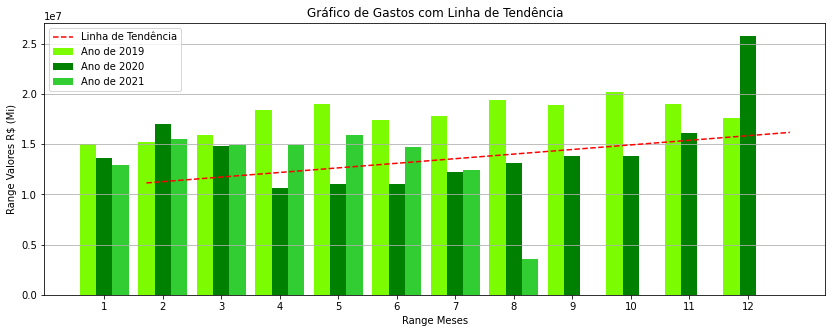

In [33]:
#Gráfico agrupado por mês, com gráfico de barra dos três anos, com linha de tendência (média)
plt.figure(figsize = (14, 5))
wid = 0.28
r1 = np.arange(len(df2019['numMes'].unique()))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]

z = np.polyfit(df_2['numMes'].sort_values().unique(), (df_2.groupby(['numMes'])['vlrDocumento'].sum().sort_values())/3, 1)
p = np.poly1d(z)
plt.plot(df_2['numMes'].sort_values().unique(), p(df_2['numMes'].sort_values().unique()), 'r--', label = 'Linha de Tendência')

plt.bar(r1, df2019.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2019', color = '#7CFC00')
plt.bar(r2, df2020.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2020', color = '#008000')
plt.bar(r3, df2021_copia.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2021', color = '#32CD32')

#plt.xticks([r + wid for r in range(df19['numMes'].unique())], ['2019', '2020'])
plt.xticks([r + wid for r in range(len(df2019['numMes'].unique()))], df2019['numMes'].sort_values().unique())

plt.title('Gráfico de Gastos com Linha de Tendência')
plt.xlabel('Range Meses')
plt.ylabel('Range Valores R$ (Mi)')

plt.legend()
plt.grid(axis = 'y')
plt.show()

Conforme é possível analisar em 2019, antes da pandemia, os gastos totais dos parlamentares iniciam com R$ 15.031.911,98, seguindo com os meses seguintes em tendência de alta, alcançando a casa dos 20mi no mês de outubro de 2019. Acompanhando a virada de ano, e, conforme cenário no período, deficit nos gastos aproximando da casa dos 10mi.

O destaque é para o mês de dezembro de 2020, onde estourou a faixa dos 25mi.

#### 2. Qual a média de gastos por parlamentar?

In [34]:
#Média de gastos agrupada por parlamentar
mean = df_2.groupby(['txNomeParlamentar'])['vlrDocumento'].mean()
mean = mean.sort_values()
mean = mean.tail()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


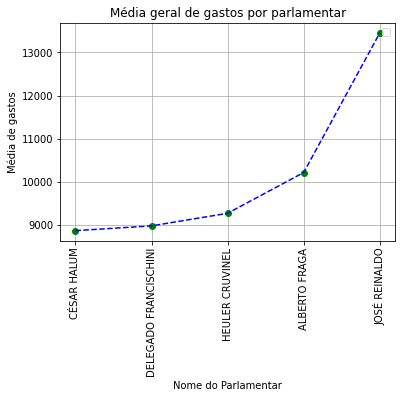

In [35]:
plt.plot(mean, 'go')
plt.plot(mean, 'b--')
plt.xticks(mean.index, rotation=90)
plt.title('Média geral de gastos por parlamentar')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Média de gastos')
plt.legend()
plt.grid(True)
plt.show()

O Deputado com a maior média de gastos no período foi José Reinaldo (PSDB - MA), com aproximadamente R$ 13 mil reais gastos por mês em cotas parlamentares, seguido por Alberto Fraga (DEM - DF), com uma média de R$ 10 mil gastos por mês no período analisado.

#### 3. Quais foram os parlamentares que mais e que menos consumiram recursos?

In [36]:
#Criaçao de um dataframe excluíndo os dados negativos de valor, e criando agrupamento ordenado por soma de gastos
df_2_2 = df_2[df_2['vlrDocumento'] >= 0]
menos_gast = df_2_2.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values().head(5)
menos_gast

txNomeParlamentar
LUCIANA SANTOS    0.49
MANDETTA          0.60
DaLua do Rota     1.08
SARNEY FILHO      1.25
ROCHA             2.53
Name: vlrDocumento, dtype: float64

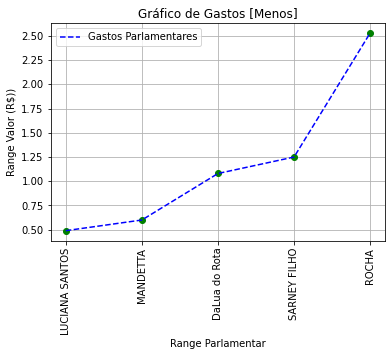

In [37]:
plt.plot(menos_gast.index, menos_gast, 'go')
plt.plot(menos_gast.index, menos_gast, 'b--', label = 'Gastos Parlamentares')

plt.xticks(menos_gast.index, rotation=90)

plt.title('Gráfico de Gastos [Menos]')
plt.xlabel('Range Parlamentar')
plt.ylabel('Range Valor (R$))')

plt.legend()
plt.grid(True)
plt.show()

In [38]:
#Agrupamento de gastos de parlamentar do maior para menor
mais_gast = df_2.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values(ascending = False).head(5)
mais_gast

txNomeParlamentar
Jéssica Sales         1416133.42
Wellington Roberto    1385090.81
Perpétua Almeida      1376839.42
Silas Câmara          1373755.01
Jesus Sérgio          1360451.70
Name: vlrDocumento, dtype: float64

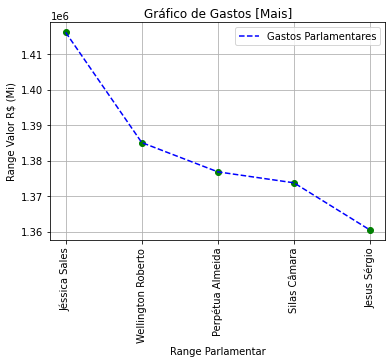

In [39]:
plt.plot(mais_gast.index, mais_gast, 'go')
plt.plot(mais_gast.index, mais_gast, 'b--', label = 'Gastos Parlamentares')

plt.xticks(mais_gast.index, rotation = 90)

plt.title('Gráfico de Gastos [Mais]')
plt.xlabel('Range Parlamentar')
plt.ylabel('Range Valor R$ (Mi)')

plt.legend()
plt.grid(True)
plt.show()

Aqui podemos notar que o deputado que mais consumiu recursos foi a Jéssica Sales, atingindo a marca de mais de R$ 1,41 Mi no período de 2019 até 2021. Já o que menos consumiu recursos públicos foi a deputada Luciana Santos, utilizando apenas 50 reais da verba, com despesas telefônicas.

### 4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

In [40]:
#Agrupamento de gastos por categoria, somando o total e ordenando do maior para o menor
categoria_oner = df_2.groupby(['txtDescricao'])['vlrDocumento'].sum().sort_values(ascending = True)
categoria_oner

txtDescricao
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR            1.539535e+05
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                  1.940142e+05
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                         4.450000e+05
ASSINATURA DE PUBLICAÇÕES                                    5.832491e+05
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    1.836470e+06
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                   2.023309e+06
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.     2.617691e+06
LOCAÇÃO OU FRETAMENTO DE AERONAVES                           3.542367e+06
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.       3.610273e+06
SERVIÇOS POSTAIS                                             3.998291e+06
PASSAGEM AÉREA - REEMBOLSO                                   5.917361e+06
TELEFONIA                                                    1.237999e+07
PASSAGEM AÉREA - SIGEPA                                      2.060582e+07
COMBUSTÍVEIS E LUBRIFICAN

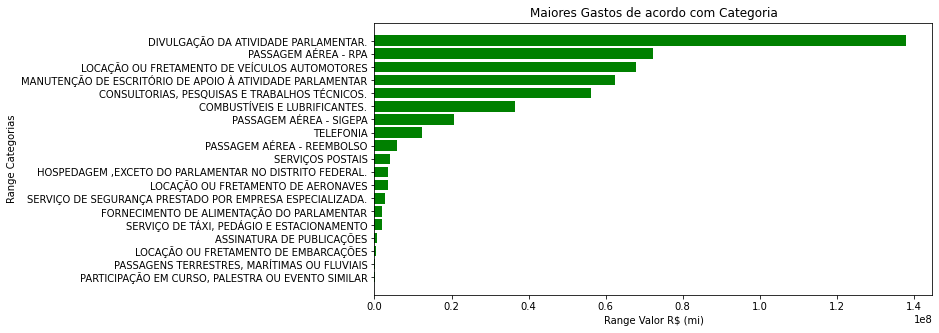

In [41]:
#Plotando gráfico barras na horizontal para meior visualização
plt.figure(figsize = (10, 5))
plt.barh(categoria_oner.index, categoria_oner, color = 'g')

#plt.xticks(categoria_oner.index)

plt.title('Maiores Gastos de acordo com Categoria')
plt.xlabel('Range Valor R$ (mi)')
plt.ylabel('Range Categorias')

plt.show()

In [42]:
categoria_oner2 = df_2.groupby(['txtDescricao'])['vlrDocumento'].sum().head().sort_values(ascending = True)
categoria_oner2

txtDescricao
ASSINATURA DE PUBLICAÇÕES                        5.832491e+05
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR       2.023309e+06
COMBUSTÍVEIS E LUBRIFICANTES.                    3.643998e+07
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.    5.627142e+07
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.             1.379023e+08
Name: vlrDocumento, dtype: float64

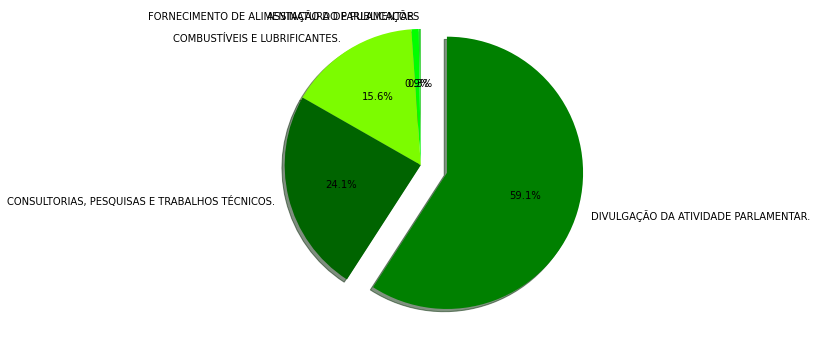

In [43]:
#Plotando em gráfico com porcentagem para melhor visualização
labels = categoria_oner2.index
sizes = categoria_oner2

explode = (0, 0, 0, 0, 0.2)

fig1, ax1 = plt.subplots(figsize=(6, 6))

cc = ['#32CD32', '#00FF00', '#7CFC00', '#006400', '#008000']

ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = cc)

ax1.axis('equal')
plt.show()

Verificamos que os gastos com divulgação de atividade parlamentar são a maioria, com aproximadamente 59,1% dos gastos entre todas as categorias.

### 5. Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?

In [44]:
#Agrupamento da contagem de viagens por trecho, as 5 maiores
trechos_recorr = df_2.groupby(['txtTrecho'])['txtTrecho'].count().sort_values(ascending = False).head(5)
trechos_recorr

txtTrecho
BSB/BSB    9890
BSB/CGH    5083
CGH/BSB    4912
BSB/SDU    4134
SDU/BSB    3987
Name: txtTrecho, dtype: int64

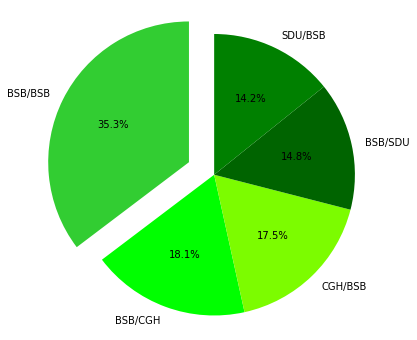

In [45]:
#Plotando em gráfico com porcentagem para melhor visualização
labels = trechos_recorr.index
sizes = trechos_recorr

explode = (0.2, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6, 6))

cc = ['#32CD32', '#00FF00', '#7CFC00', '#006400', '#008000']

ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90, colors = cc)

ax1.axis('equal')
plt.show()

A maior parte dos gastos com transporte é derivada de viagens dentro de Brasilia (BSB), atingindo o percentual de 35,3% dos gastos totais. 

Lembrando que gastos com transporte englobam tanto o valor de gasolina gasto quanto passagens de avião e locação de carros.

### 6. Qual a média de gastos por estado?

In [46]:
#Média de gastos por estados
media_estados = df_2.groupby(['sgUF'])['vlrDocumento'].mean().sort_values()
media_estados

sgUF
SC     564.018704
RS     568.061800
MG     690.850698
PR     691.593533
SP     692.750580
RJ     803.591608
MT     805.568393
RN     847.517948
PE     868.561441
RO     869.159740
MS     912.584921
TO     920.312509
ES     936.424195
BA     979.921451
PB    1075.305504
CE    1245.679204
PA    1257.199314
GO    1285.133295
MA    1376.814856
SE    1431.695723
AL    1473.456565
PI    1495.355586
DF    1553.381828
AC    1601.271119
AM    1606.099154
RR    1664.401116
AP    1944.971260
Name: vlrDocumento, dtype: float64

In [47]:
media_estados2 = df_2.groupby(['sgUF'])['vlrDocumento'].sum().sort_values()
media_estados2

sgUF
DF     4385196.90
RO     6529127.97
MS     7273301.82
MT     7459563.32
RN     8630275.26
TO     8630690.71
SE     8767704.61
ES     8911012.64
RR     8996088.03
AM     9191705.46
AL     9767543.57
AP    10144970.09
AC    10731719.04
PI    10892170.09
SC    11223972.21
PB    13685413.15
GO    14541283.23
PA    18106184.52
MA    19842655.70
CE    24455174.13
PE    24573340.28
RS    27532251.28
PR    28919675.19
RJ    40721201.15
BA    42460976.39
MG    45038629.57
SP    58103069.37
Name: vlrDocumento, dtype: float64

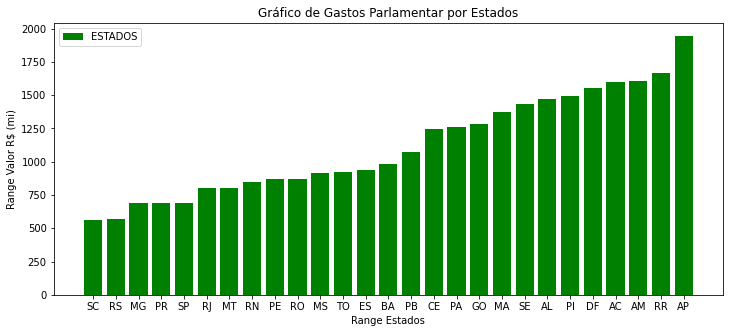

In [48]:
#Plotando em gráfico de barras a média dos estados, na ordem do maior para menor
plt.figure(figsize = (12, 5))
plt.bar(media_estados.index, media_estados, color = 'g', label = 'ESTADOS')
#plt.plot(media_estados.index, media_estados, 'r--')

#plt.xticks(media_estados.index)
plt.title('Gráfico de Gastos Parlamentar por Estados')
plt.xlabel('Range Estados')
plt.ylabel('Range Valor R$ (mi)')

plt.legend()
plt.show()

Aqui podemos notar a região norte dominando, sendo o Amapá campeão em gastos parlamentares, com somados aproximadamente 2 bilhões em reais gastos nesses 3 anos.

### 7. Qual é o valor total de gastos por estado?

In [49]:
gastos_uftotal = df_copia[['sgUF' , 'vlrLiquido']].groupby('sgUF').sum().sort_values('vlrLiquido', ascending = False).round(2)

gastos_uftotal.rename(columns = {'vlrLiquido':'Valor_Total'}, inplace = True)

gastos_uftotal = gastos_uftotal.reset_index()

gastos_uftotal2 = gastos_uftotal.style.format({'Valor_Total': 'R$ {:.2F}'}).background_gradient(cmap = 'coolwarm')

gastos_uftotal2

,sgUF,Valor_Total
0,SP,R$ 52635438.40
1,MG,R$ 43162671.56
2,BA,R$ 39441897.60
3,RJ,R$ 36707801.80
4,PR,R$ 26785753.60
5,RS,R$ 25075845.74
6,CE,R$ 21933892.08
7,PE,R$ 21591701.23
8,MA,R$ 18126874.79
9,PA,R$ 16469118.51


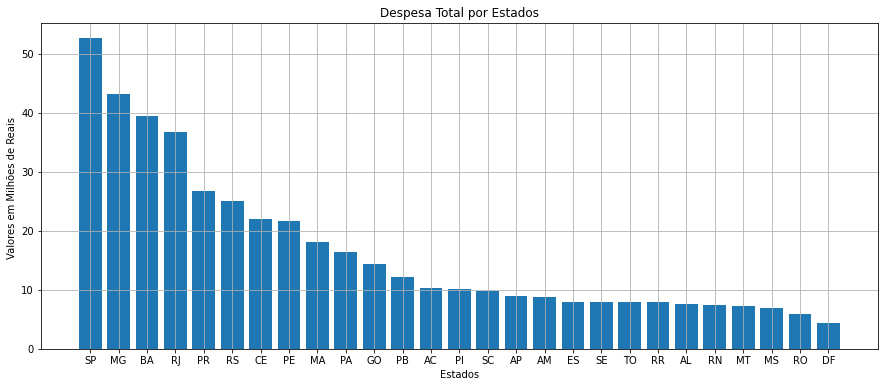

In [50]:
plt.figure(figsize=(15,6))
x = gastos_uftotal.sgUF
y = gastos_uftotal['Valor_Total']/1000000
plt.grid()
plt.title('Despesa Total por Estados')
plt.xlabel('Estados')
plt.ylabel('Valores em Milhões de Reais ')
plt.bar(x,y)
print()

### 8. Quais estados têm maior número de representantes?

In [51]:
parlamentares_uf = df_copia[['txNomeParlamentar', 'sgUF']].drop_duplicates()

parlamentares_uf = parlamentares_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending = False)

parlamentares_uf.rename(columns = {'txNomeParlamentar':'Quantidade De Representantes'}, inplace = True)

parlamentares_uf = parlamentares_uf.reset_index()

maximo = parlamentares_uf['Quantidade De Representantes'].max()

parlamentares_uf.head(1)



,sgUF,Quantidade De Representantes
0,SP,104


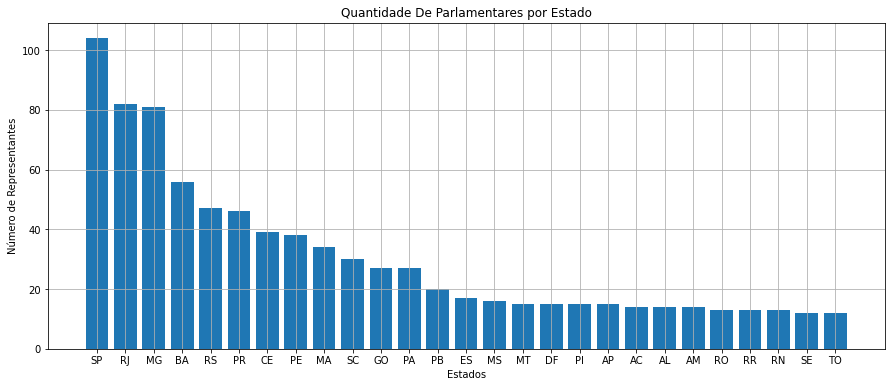

In [52]:
plt.figure(figsize=(15,6))
x = parlamentares_uf.sgUF
y = parlamentares_uf['Quantidade De Representantes']
plt.grid()
plt.title('Quantidade De Parlamentares por Estado')
plt.xlabel('Estados')
plt.ylabel('Número de Representantes')
plt.bar(x,y)
print()

### 9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?

In [53]:
gastos_uftotal = df_copia[['sgUF' , 'vlrLiquido']].groupby('sgUF').sum().sort_values('vlrLiquido', ascending = False).round(2)

gastos_uftotal.rename(columns = {'vlrLiquido':'Valor_Total'}, inplace = True)

gastos_uftotal = gastos_uftotal.reset_index()

parlamentares_uf = df_copia[['txNomeParlamentar', 'sgUF']].drop_duplicates()

parlamentares_uf = parlamentares_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending = False)

parlamentares_uf.rename(columns = {'txNomeParlamentar':'Quantidade De Representantes'}, inplace = True)

parlamentares_uf = parlamentares_uf.reset_index()

maximo = parlamentares_uf['Quantidade De Representantes'].max()



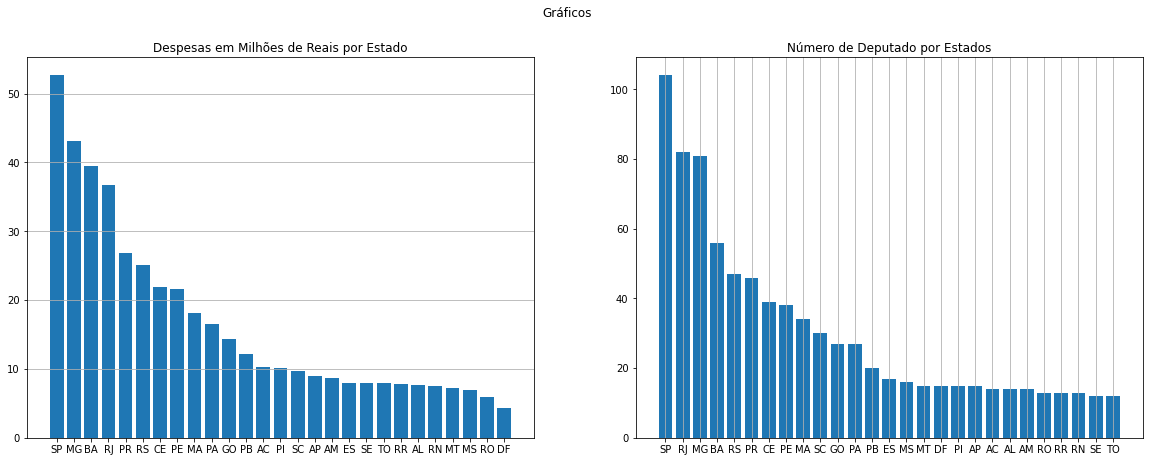

In [54]:
y = np.array(gastos_uftotal['Valor_Total']/1000000)
x = np.array(gastos_uftotal.sgUF)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.grid(axis= 'y')
plt.bar(x,y)
plt.title('Despesas em Milhões de Reais por Estado')

x = np.array(parlamentares_uf.sgUF)
y = np.array(parlamentares_uf['Quantidade De Representantes'])
plt.subplot(1,2,2)
plt.bar(x,y)
plt.grid(axis= 'x')
plt.title('Número de Deputado por Estados')
plt.suptitle('Gráficos')
plt.show()

In [55]:
auxiliar = pd.merge(gastos_uftotal,parlamentares_uf, on = ['sgUF'])

auxiliar = auxiliar.reset_index()

auxiliar.rename(columns = {'Valor_Total	': 'Valor_Total'}, inplace = True)

auxiliar

,index,sgUF,Valor_Total,Quantidade De Representantes
0,0,SP,52635438.40,104
1,1,MG,43162671.56,81
2,2,BA,39441897.60,56
3,3,RJ,36707801.80,82
4,4,PR,26785753.60,46
5,5,RS,25075845.74,47
6,6,CE,21933892.08,39
7,7,PE,21591701.23,38
8,8,MA,18126874.79,34
9,9,PA,16469118.51,27


Aplicando Normalização Biblioteca MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dados_normalizados = scaler.fit_transform(auxiliar[['Valor_Total', 'Quantidade De Representantes']])

In [57]:
dados_normalizados = pd.DataFrame(dados_normalizados)

dados_normalizados.rename(columns= {0:'Valor_Total', 1: 'Quantidade De Representantes'}, inplace = True)

dados_normalizados

,Valor_Total,Quantidade De Representantes
0,1.000000,1.000000
1,0.804005,0.750000
2,0.727021,0.478261
3,0.670451,0.760870
4,0.465160,0.369565
5,0.429781,0.380435
6,0.364773,0.293478
7,0.357693,0.282609
8,0.286004,0.239130
9,0.251705,0.163043


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


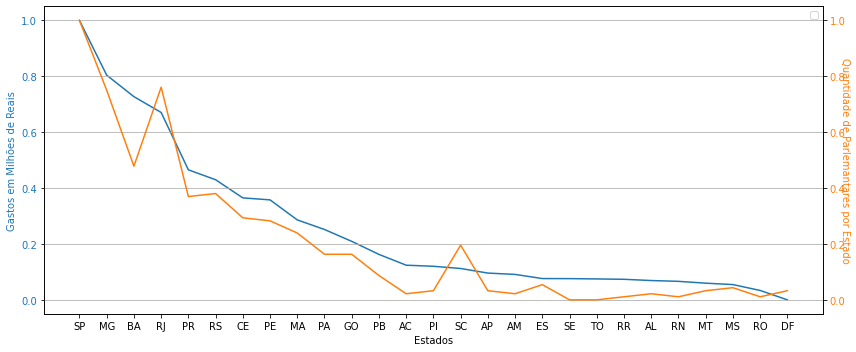

In [58]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Estados')
ax1.set_ylabel('Gastos em Milhões de Reais', color = color)
ax1.plot(auxiliar.sgUF, dados_normalizados.Valor_Total, color = color)
ax1.tick_params(axis = 'y',labelcolor = color)

ax2 = ax1.twinx()
 
color = 'tab:orange'
ax2.set_ylabel('Quantidade de Parlemantares por Estado', color = color, rotation = '270')
ax2.plot(dados_normalizados['Quantidade De Representantes'], color = color)
ax2.tick_params(axis = 'y',labelcolor = color)

plt.gcf().set_size_inches(12,5)
fig.tight_layout()
plt.grid()
plt.legend()
plt.show()

### 10. Qual a média de gastos por partido?

In [59]:
gastos_partidos = df_copia[['sgPartido','vlrLiquido']].groupby(['sgPartido']).mean().sort_values('vlrLiquido', ascending = False)

gastos_partidos = gastos_partidos.reset_index()

gastos_partidos.style.format({'vlrLiquido':'R$ {:.2f}'}).background_gradient(cmap = 'Reds')

,sgPartido,vlrLiquido
0,PROGRESSISTAS,R$ 6487.50
1,SOCIAL,R$ 2464.79
2,PPL,R$ 2246.29
3,S.PART.,R$ 1614.39
4,PHS,R$ 1295.36
5,PRB,R$ 1169.67
6,REDE,R$ 1151.66
7,PCdoB,R$ 1101.11
8,PSC,R$ 1092.36
9,PR,R$ 1090.14


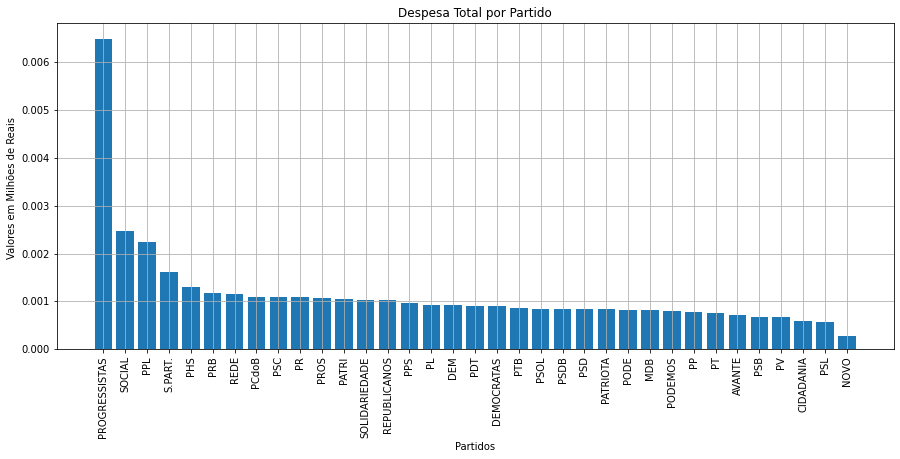

In [60]:
plt.figure(figsize=(15,6))
x = gastos_partidos.sgPartido
y = gastos_partidos['vlrLiquido']/1000000
plt.xticks(gastos_partidos.index, rotation=90)
plt.grid()
plt.title('Despesa Total por Partido')
plt.xlabel('Partidos')
plt.ylabel('Valores em Milhões de Reais ')
plt.bar(x,y)
print()

### 11. Quais são os partidos que mais e que menos consumiram a cota parlamentar?

In [61]:
gastos_partidos2 = df_copia[['sgPartido','vlrLiquido']].groupby(['sgPartido']).sum().sort_values('vlrLiquido', ascending = False)

gastos_partidos2 = gastos_partidos2.reset_index()

gastos_partidos2.style.format({'vlrLiquido':'R$ {:.2f}'}).background_gradient(cmap = 'Reds')

,sgPartido,vlrLiquido
0,PT,R$ 53547200.12
1,PSL,R$ 38760321.58
2,PL,R$ 36009565.01
3,PP,R$ 34429101.14
4,MDB,R$ 31505872.66
5,PSD,R$ 30980983.76
6,REPUBLICANOS,R$ 29649278.16
7,PSDB,R$ 29284952.26
8,PDT,R$ 26189478.80
9,DEM,R$ 24800421.63


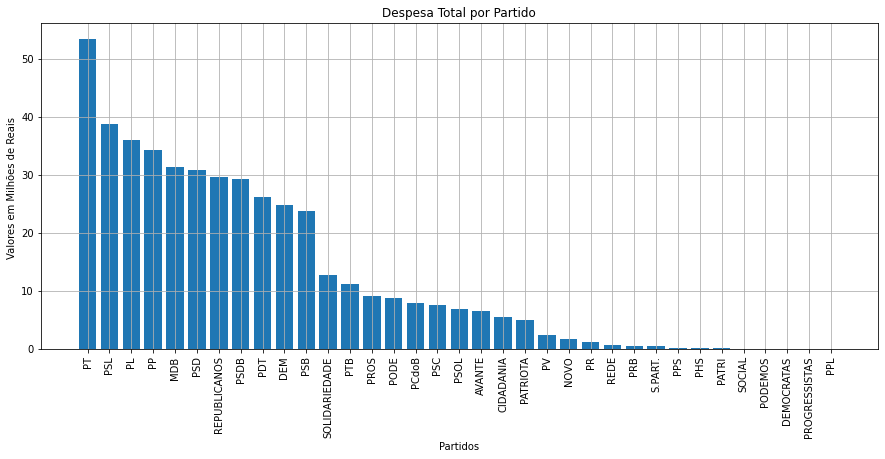

In [62]:
plt.figure(figsize=(15,6))
x = gastos_partidos2.sgPartido
y = gastos_partidos2['vlrLiquido']/1000000
plt.xticks(gastos_partidos2.index, rotation=90)
plt.grid()
plt.title('Despesa Total por Partido')
plt.xlabel('Partidos')
plt.ylabel('Valores em Milhões de Reais ')
plt.bar(x,y)
print()

In [63]:
gastos_partidos2 = df_copia[['sgPartido','vlrLiquido']].groupby(['sgPartido']).sum().sort_values('vlrLiquido', ascending = True)

gastos_partidos2 = gastos_partidos2.reset_index().head(10)

gastos_partidos2.style.format({'vlrLiquido':'R$ {:.2f}'}).background_gradient(cmap = 'Reds')

,sgPartido,vlrLiquido
0,PPL,R$ 44925.75
1,PROGRESSISTAS,R$ 64875.00
2,DEMOCRATAS,R$ 67103.60
3,PODEMOS,R$ 110837.08
4,SOCIAL,R$ 125704.52
5,PATRI,R$ 161737.83
6,PHS,R$ 180055.49
7,PPS,R$ 218419.43
8,S.PART.,R$ 608624.30
9,PRB,R$ 621097.18


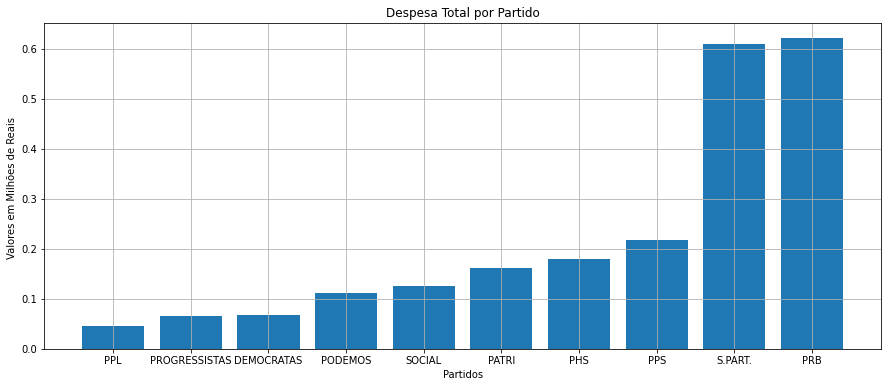

In [64]:
plt.figure(figsize=(15,6))
x = gastos_partidos2.sgPartido
y = gastos_partidos2['vlrLiquido']/1000000
plt.grid()
plt.title('Despesa Total por Partido')
plt.xlabel('Partidos')
plt.ylabel('Valores em Milhões de Reais ')
plt.bar(x,y)
print()

### 12. Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?

In [65]:
gastos_uftotal = df_copia[['sgPartido' , 'vlrLiquido']].groupby('sgPartido').sum().sort_values('vlrLiquido', ascending = False).round(2)

gastos_uftotal.rename(columns = {'vlrLiquido':'Valor_Total'}, inplace = True)

gastos_uftotal = gastos_uftotal.reset_index()

parlamentares_uf = df_copia[['txNomeParlamentar', 'sgPartido']].drop_duplicates()

parlamentares_uf = parlamentares_uf.groupby('sgPartido').count().sort_values('txNomeParlamentar', ascending = False)

parlamentares_uf.rename(columns = {'txNomeParlamentar':'Quantidade De Representantes'}, inplace = True)

parlamentares_uf = parlamentares_uf.reset_index()

maximo = parlamentares_uf['Quantidade De Representantes'].max()

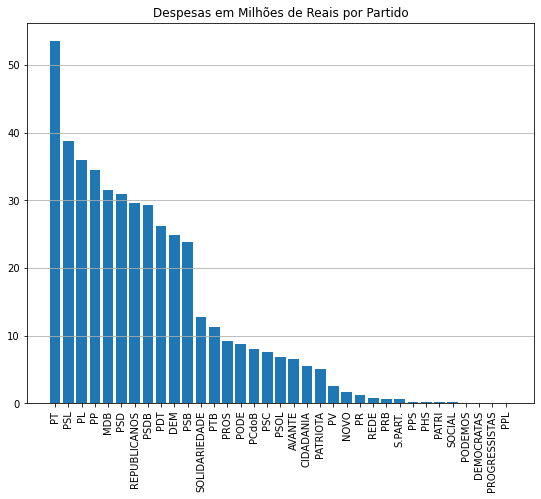

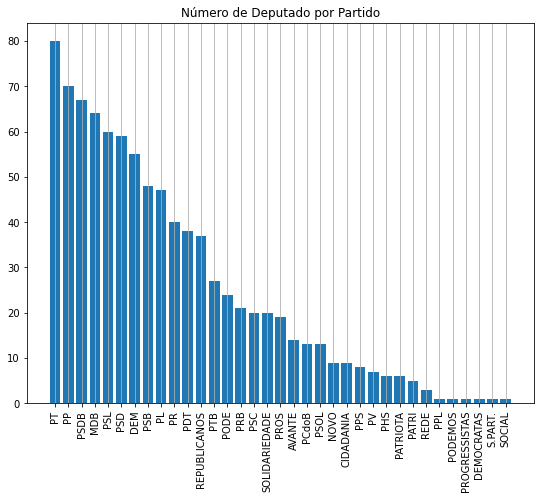

In [66]:
y = np.array(gastos_uftotal['Valor_Total']/1000000)
x = np.array(gastos_uftotal.sgPartido)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.xticks(gastos_uftotal.index, rotation = 90)
plt.grid(axis= 'y')
plt.bar(x,y)
plt.title('Despesas em Milhões de Reais por Partido')

x = np.array(parlamentares_uf.sgPartido)
y = np.array(parlamentares_uf['Quantidade De Representantes'])
plt.figure(figsize=(20,7))
plt.subplot(1,2,2)
plt.xticks(parlamentares_uf.index, rotation = 90)
plt.bar(x,y)
plt.grid(axis= 'x')
plt.title('Número de Deputado por Partido')
plt.show()

#### Extra - 1 . Qual foi o CNPJ que recebeu mais pagamentos de parlamentares ?

In [67]:
#Agrupando por CNPJ/CPF e somando os valores dos documentos e ordenando do maior para o menor e capturando o top five
df_extra1 = df_2.groupby(['txtFornecedor'])['vlrDocumento'].sum().sort_values(ascending = False).head(10)
df_extra1

txtFornecedor
Cia Aérea - TAM                                          32752885.79
Cia Aérea - GOL                                          29256102.71
TAM                                                      10427117.77
GOL                                                       8986462.99
Cia Aérea - AZUL                                          8724624.30
PANTANAL VEÍCULOS LTDA                                    5987345.18
CELULAR FUNCIONAL                                         2618129.02
GOLD CAR BRASILIA LOCADORA DE VEICULOS ME                 2539853.00
DMD Gestão Administrativa LTDA - ME                       2210000.00
VERTICE - SOCIEDADE CIVIL DE PROFISSIONAIS ASSOCIADOS     1855697.00
Name: vlrDocumento, dtype: float64

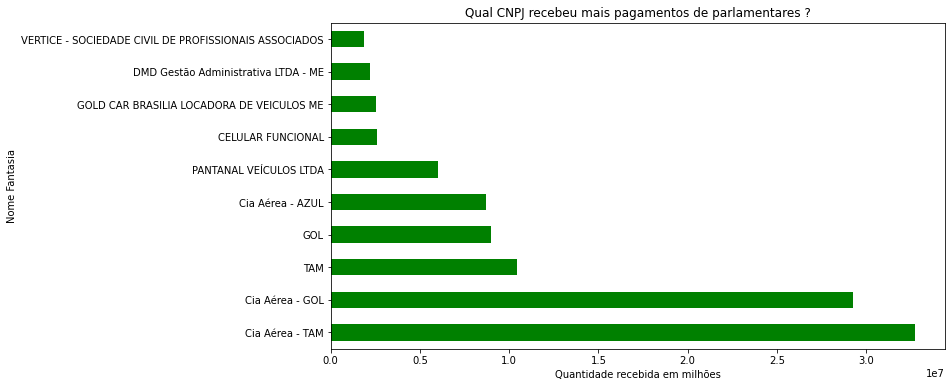

In [68]:
df_extra1.plot(kind='barh',figsize=(11,6),grid=False,rot=0,color='green')
plt.title('Qual CNPJ recebeu mais pagamentos de parlamentares ?')
plt.xlabel('Quantidade recebida em milhões')
plt.ylabel('Nome Fantasia')
plt.show()

#### Extra - 2. Em qual mês foram emitidos mais notas fiscais no ano de 2020 ?

In [69]:
#Agrupando por mês e contando a quantidade de notas emitidas ordenando do maior para o menor e capturando apenas o 1 elemento
df2020 = df2020.groupby(['numMes'])['datEmissao'].count().sort_values(ascending = False)
df2020

numMes
2     20920
3     16859
12    15019
1     14463
10    13439
11    12986
9     12408
8     12090
7     11358
6      9589
5      8241
4      7615
Name: datEmissao, dtype: int64

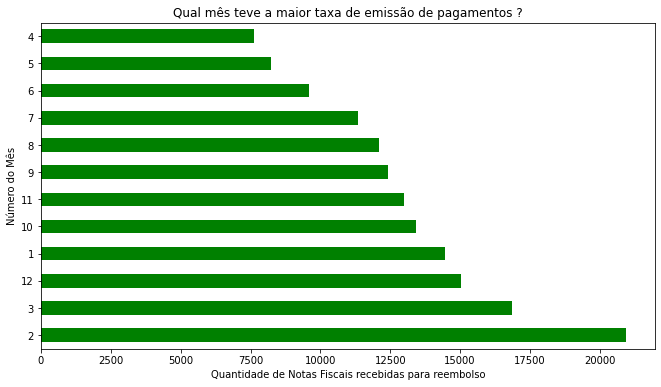

In [70]:
df2020.plot(kind='barh',figsize=(11,6),grid=False,rot=0,color='green')
plt.title('Qual mês teve a maior taxa de emissão de pagamentos ?')
plt.xlabel('Quantidade de Notas Fiscais recebidas para reembolso')
plt.ylabel('Número do Mês')
plt.show()

# MÓDULO 6 - TOCANTINS

In [ ]:
#Mostrar as colunas para explorarmos o df
df_copia.columns

In [72]:
#Novo dataframe com o filtro só para deputados do estado de Tocantins
df_TO = df_copia[df_copia['sgUF'] == 'TO']

In [ ]:
#Simples visualização dos primeiros registros
df_TO.head(2)

In [ ]:
df_TO.isna().sum()

In [89]:

df_tocantins = df_TO.sort_values(by=['vlrLiquido'], ascending=False)
df_tocantins.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
109715,Professora Dorinha Seabra Rezende,4.319693e+10,160639.0,67.0,2019,TO,DEM,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ALENCAR & MARTINS LTDA-ME,056.493.380/0019-2,201900000003750,0,2019-12-11 00:00:00,109500.0,0.0,109500.0,12,2019,0,NaN,NaN,1661126,NaN,NaN,2300,6981838,https://www.camara.leg.br/cota-parlamentar/doc...
55884,Professora Dorinha Seabra Rezende,4.319693e+10,160639.0,67.0,2019,TO,DEM,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,GRAFICA E EDITORA SANTO EXPEDITO,090.151.220/0012-6,202000000001603,0,2020-12-14 01:00:00,105600.0,0.0,105600.0,12,2020,0,NaN,NaN,1733387,NaN,NaN,2300,7129412,https://www.camara.leg.br/cota-parlamentar/doc...
55885,Professora Dorinha Seabra Rezende,4.319693e+10,160639.0,67.0,2019,TO,DEM,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,GRAFICA E EDITORA SANTO EXPEDITO LTDA,090.151.220/0012-6,202000000001480,0,2020-11-20 01:00:00,51250.0,0.0,51250.0,11,2020,0,NaN,NaN,1728438,NaN,NaN,2300,7119201,https://www.camara.leg.br/cota-parlamentar/doc...
184326,Célio Moura,1.236498e+10,204370.0,62.0,2019,TO,PT,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,ARTES GRAFICAS TOCANTINS LTDA - ME,138.840.240/0010-0,201900000000140,0,2019-12-20 00:00:00,44560.0,0.0,44560.0,12,2019,0,NaN,NaN,1665905,NaN,NaN,3203,6991464,https://www.camara.leg.br/cota-parlamentar/doc...
30223,Vicentinho Júnior,9.989866e+10,137070.0,66.0,2019,TO,PL,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DMD Gestão Administrativa LTDA - ME,026.102.350/0012-0,337,4,2020-01-23 00:00:00,40000.0,0.0,40000.0,1,2020,0,NaN,NaN,1668289,NaN,NaN,3059,6997536,http://camara.leg.br/cota-parlamentar/nota-fis...


In [91]:
# Professora Dorinha gasta pra caramba

dfteste = df_TO[df_TO['txNomeParlamentar'].str.contains('Osires Damaso')]
dfteste2 = dfteste.sort_values(by=['vlrLiquido'], ascending=False)
dfteste2.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
93687,Osires Damaso,2.784828e+10,204363.0,64.0,2019,TO,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,Prado & Gomes Advogados Associados,355.762.420/0010-2,202000000000027,0,2020-12-21 01:00:00,32500.0,0.0,32500.0,11,2020,0,NaN,NaN,1735664,NaN,NaN,3239,7133923,https://www.camara.leg.br/cota-parlamentar/doc...
93688,Osires Damaso,2.784828e+10,204363.0,64.0,2019,TO,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,Prado & Gomes Advogados Associados,355.762.420/0010-2,202000000000028,0,2020-12-29 01:00:00,30500.0,0.0,30500.0,12,2020,0,NaN,NaN,1736650,NaN,NaN,3239,7136260,https://www.camara.leg.br/cota-parlamentar/doc...
181062,Osires Damaso,2.784828e+10,204363.0,64.0,2019,TO,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DMD Gestão Administrativa LTDA - ME,026.102.350/0012-0,311,4,2019-08-05 00:00:00,20000.0,0.0,20000.0,7,2019,0,NaN,NaN,1617492,NaN,NaN,3239,6882641,http://camara.leg.br/cota-parlamentar/nota-fis...
93680,Osires Damaso,2.784828e+10,204363.0,64.0,2019,TO,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DMD Gestão Administrativa LTDA - ME,026.102.350/0012-0,365,4,2020-07-06 00:00:00,20000.0,0.0,20000.0,6,2020,0,NaN,NaN,1705163,NaN,NaN,3239,7070520,http://camara.leg.br/cota-parlamentar/nota-fis...
62624,Osires Damaso,2.784828e+10,204363.0,64.0,2019,TO,PSC,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DMD Gestão Administrativa LTDA - ME,026.102.350/0012-0,397,4,2021-02-02 00:00:00,20000.0,0.0,20000.0,1,2021,0,NaN,NaN,1743009,NaN,NaN,3239,7149573,http://camara.leg.br/cota-parlamentar/nota-fis...


# Cnpj's

In [75]:
#Instalação do package requests para capturarmos dados por meio da url
!pip3 install requests

You should consider upgrading via the 'C:\Users\sart\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [76]:
#Importação das libs que trabalharemos e configurar display para visualizar todas as colunas (jupyter)
import requests
import json
pd.set_option('display.max_columns', None)

In [77]:
#Rascunhos
"""
request = requests.get("https://minhareceita.org/CNPJ")
request = js.loads(request.content)
df_exemplo = pd.DataFrame([request])
df_exemplo"""

'\nrequest = requests.get("https://minhareceita.org/CNPJ")\nrequest = js.loads(request.content)\ndf_exemplo = pd.DataFrame([request])\ndf_exemplo'

In [78]:
#Seleção dos cnpj/cpf com total de soma e ordenado para somente os 10 primeiros. Transformandos a series em df e aplicamos...
#nome da coluna de retorno do groupby de Valor e resetamos o index
df_gasto = pd.DataFrame({'Valor': df_copia.groupby(['txtCNPJCPF'])['vlrDocumento'].sum().sort_values(ascending = False).head(10)}).reset_index()
df_gasto

,txtCNPJCPF,Valor
0,020.128.620/0016-0,35175761.77
1,075.756.510/0015-9,30504710.02
2,092.962.950/0016-0,9269181.03
3,073.193.230/0019-1,6333604.18
4,025.581.570/0016-2,5459504.33
5,000.000.000/0000-7,3579858.78
6,267.352.270/0017-9,2900098.00
7,000.000.000/0000-1,2618129.02
8,026.102.350/0012-0,2263000.00
9,054.434.490/0014-8,1862697.00


In [79]:
#Atribuímos o retorno do get no formado json à nova coluna dados_CNPJ em nosso dataframe do groupby
df_gasto['dados_CNPJ'] = df_gasto['txtCNPJCPF'].map(lambda x: requests.get(f"https://minhareceita.org/{x}"))

In [80]:
#Atribuímos a formatação do json para modelo de dicionário
df_gasto['dados_CNPJ'] = df_gasto['dados_CNPJ'].map(lambda x: js.loads(x.content))

NameError: name 'js' is not defined

In [ ]:
#Simples visualização formatando o dict em list e convertendo-o em dataframe
pd.DataFrame(list(df_gasto['dados_CNPJ']))

In [ ]:
df_TO